# Download (and save) seismic waveforms 

This notebook fetch seismic waveforms for different seismic events from the new database. It first looks at the available seismic stations for different events within a given radius, and then tries to download the waveforms for each events and save them in a given directory. Only the nearest seismic signal is kept.

In [5]:
from tqdm.notebook import tqdm

import catalog
import waveform

tqdm.pandas()
catalog.display_parameters()

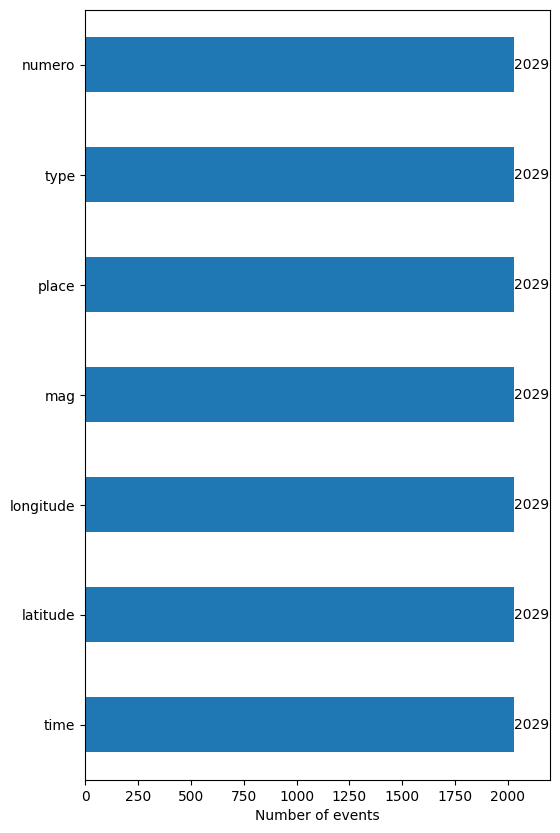

In [6]:
dataframe = catalog.load("data/new_database.pickle")

dataframe['numero'] = range(len(dataframe)) ## To have a better manipulation of the events

catalog.open_plot(dataframe, pos_number=0.04, xlim=2200)

## Fetch available stations for each event

Get the inventory of waveforms per avalanche for a radius = 5° and put it in a new column

In [7]:
dataframe["inventory"] = dataframe.progress_apply( 
    lambda row: waveform.download_inventory(row, maxradius=5, retries=3), axis=1
)

dataframe.to_pickle("data/new_dataframe_with_inventory.pickle")

  0%|          | 0/2029 [00:00<?, ?it/s]

Error for download inventory. Attempt 1 of 3. Error: No data available for request.
HTTP Status code: 204
Detailed response of server:


Error for download inventory. Attempt 2 of 3. Error: No data available for request.
HTTP Status code: 204
Detailed response of server:


Error for download inventory. Attempt 3 of 3. Error: No data available for request.
HTTP Status code: 204
Detailed response of server:


Error for download inventory. Attempt 1 of 3. Error: No data available for request.
HTTP Status code: 204
Detailed response of server:


Error for download inventory. Attempt 2 of 3. Error: No data available for request.
HTTP Status code: 204
Detailed response of server:


Error for download inventory. Attempt 3 of 3. Error: No data available for request.
HTTP Status code: 204
Detailed response of server:


Error for download inventory. Attempt 1 of 3. Error: No data available for request.
HTTP Status code: 204
Detailed response of server:


Error for download inventory. Attempt 2 o

## Download and save the waveforms

This cell downloads the closest waveform of each event from the database.

In [ ]:
for event in tqdm(dataframe.itertuples(), total=len(dataframe)):
    #if event.Index == 0 : ## Uncomment this line to download a specific event
        stream = waveform.download_stream(event, time_margins=100, print_error=True)
        if stream:
            stream.write(f"sismogrammes/{event.Index:03d}.pickle", format="PICKLE")